In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models
import torchvision.transforms as T
from PIL import Image
from torch.autograd import Variable
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


scaler = T.Resize((224, 224))
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = T.ToTensor()

In [2]:
def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name).convert("RGB")
    image = Variable(normalize(to_tensor(scaler(image))).unsqueeze(0))
    
    return image     

In [3]:
#load sample image
IM = image_loader('Frames/Figure_23_Bulge/Figure_23_Bulge_1.jpg')
IM = IM.cuda()

In [4]:
#Load pretrained model as encoder
model = torchvision.models.resnet50(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])
model.cuda()
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [5]:
#Create decoder
decode = nn.Sequential(nn.ReLU(),
                      nn.ConvTranspose2d(2048, 3, 224))

decode.cuda()



Sequential(
  (0): ReLU()
  (1): ConvTranspose2d(2048, 3, kernel_size=(224, 224), stride=(1, 1))
)

In [6]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(decode.parameters(), lr=0.01)


In [7]:
encode_out = model(IM)
print(encode_out.shape)

torch.Size([1, 2048, 1, 1])


In [8]:
for ii in range(0,20):
    encode_out = model(IM)
    #print(encode_out.shape)

    optimizer.zero_grad()
    # forward pass: compute predicted outputs by passing inputs to the model
    #outputs = model(images)
    # calculate the loss
    decode_out = decode(encode_out)
    #print(decode_out.shape)
    #print(IM.shape)
    loss = criterion(decode_out, IM)
    # backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()
    # perform a single optimization step (parameter update)
    optimizer.step()
    # update running training loss
   # print(loss.item()*IM.size(0))
  


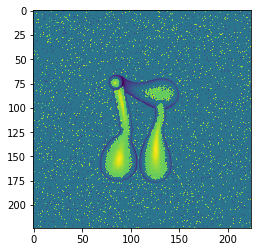

In [9]:
output = decode_out.cpu().detach().numpy()
    #IM = IM.cpu().detach().numpy()
    #print(IM.shape)
output = np.squeeze(output)
plt.imshow(output[0])

In [10]:
print(loss.item()*IM.size(0))

1.997343897819519
